### Answers of Key Questions with some visualizations

In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

#### setup DBs connection

In [2]:
#Setup Connection with the 1st DB
conn = sqlite3.connect('databases/deliveroo.db')
# Attach the other two databases
conn.execute("ATTACH DATABASE 'databases/takeaway.db' AS tw;")
conn.execute("ATTACH DATABASE 'databases/ubereats.db' AS ue;")

# Verify attached databases
databases = conn.execute("PRAGMA database_list;").fetchall()
print("Attached Databases:")
for db in databases:
    print(db)

Attached Databases:
(0, 'main', 'd:\\Becode\\delivery-market-analysis-with-SQL\\databases\\deliveroo.db')
(2, 'tw', 'd:\\Becode\\delivery-market-analysis-with-SQL\\databases\\takeaway.db')
(3, 'ue', 'd:\\Becode\\delivery-market-analysis-with-SQL\\databases\\ubereats.db')


#### 1- Price Distribution of Menu Items

##### Deliveroo DB

In [4]:
#SQL Querey For deliveroo
try:
    deliveroo = """                              
        SELECT 
            CASE
                WHEN price_float BETWEEN 1.0 AND 10.0 THEN '1.0-10.0'
                WHEN price_float > 10.0 AND price_float <= 20.0 THEN '10.0-20.0'
                WHEN price_float > 20.0 AND price_float <= 30.0 THEN '20.0-30.0'
                WHEN price_float > 30.0 AND price_float <= 50.0 THEN '30.0-50.0'
                ELSE '50.0+'
            END AS price_range,
            COUNT(*) AS item_count
        FROM menu_items
        WHERE price_float > 1.0
        GROUP BY price_range
        ORDER BY price_range;
        """
    deliveroo_results = conn.execute(deliveroo).fetchall()
    for price_range, item_count in deliveroo_results:
        print(f"Price Range: {price_range}, Item Count: {item_count}")
except sqlite3.OperationalError as e:
    print("Error:", e)

Price Range: 1.0-10.0, Item Count: 159003
Price Range: 10.0-20.0, Item Count: 47466
Price Range: 20.0-30.0, Item Count: 8090
Price Range: 30.0-50.0, Item Count: 2173
Price Range: 50.0+, Item Count: 1060


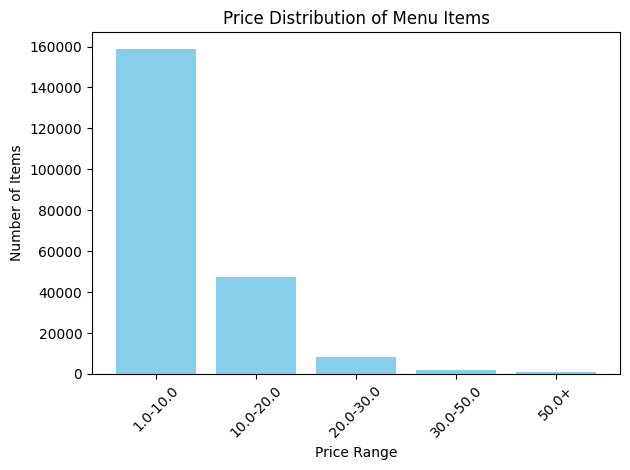

In [5]:
# Fetch results
# Prepare data for plotting
price_ranges = [x[0] for x in deliveroo_results]  # Get the price range labels
item_counts = [x[1] for x in deliveroo_results]  # Get the counts for each price range

# Create a bar plot (histogram)
plt.bar(price_ranges, item_counts, color='skyblue')
plt.title('Price Distribution of Menu Items')
plt.xlabel('Price Range')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make room for the labels

# Show the plot
plt.show()

##### Takeawy DB

In [6]:
try:
    takeAwy = """                              
    SELECT 
        CASE
            WHEN price_float BETWEEN 1.0 AND 10.0 THEN '1.0-10.0'
            WHEN price_float > 10.0 AND price_float <= 20.0 THEN '10.0-20.0'
            WHEN price_float > 20.0 AND price_float <= 30.0 THEN '20.0-30.0'
            WHEN price_float > 30.0 AND price_float <= 50.0 THEN '30.0-50.0'
            ELSE '50.0+'
        END AS price_range,
        COUNT(*) AS item_count
    FROM tw.menuItems
    WHERE price_float > 1.0
    GROUP BY price_range
    ORDER BY price_range;
    """
    takeAwy_results = conn.execute(takeAwy).fetchall()
    for price_range, item_count in takeAwy_results:
        print(f"Price Range: {price_range}, Item Count: {item_count}")
except sqlite3.OperationalError as e:
    print("Error:", e)

Price Range: 1.0-10.0, Item Count: 215255
Price Range: 10.0-20.0, Item Count: 149249
Price Range: 20.0-30.0, Item Count: 18073
Price Range: 30.0-50.0, Item Count: 3208
Price Range: 50.0+, Item Count: 2093


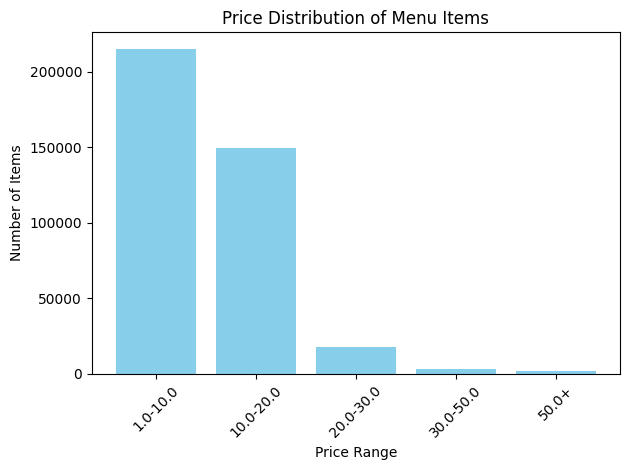

In [7]:
price_ranges = [x[0] for x in takeAwy_results]  # Get the price range labels
item_counts = [x[1] for x in takeAwy_results]  # Get the counts for each price range

# Create a bar plot (histogram)
plt.bar(price_ranges, item_counts, color='skyblue')
plt.title('Price Distribution of Menu Items')
plt.xlabel('Price Range')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make room for the labels

# Show the plot
plt.show()

##### UberEats DB

In [8]:
try:
    uberEats="""                              
    SELECT 
        CASE
            WHEN price_float BETWEEN 1.0 AND 10.0 THEN '1.0-10.0'
            WHEN price_float > 10.0 AND price_float <= 20.0 THEN '10.0-20.0'
            WHEN price_float > 20.0 AND price_float <= 30.0 THEN '20.0-30.0'
            WHEN price_float > 30.0 AND price_float <= 50.0 THEN '30.0-50.0'
            ELSE '50.0+'
        END AS price_range,
        COUNT(*) AS item_count
    FROM ue.menu_items
    WHERE price_float > 1.0
    GROUP BY price_range
    ORDER BY price_range;
    """

    uberEats_results = conn.execute(uberEats).fetchall()
    for price_range, item_count in uberEats_results:
        print(f"Price Range: {price_range}, Item Count: {item_count}")
except sqlite3.OperationalError as e:
    print("Error:", e)

Price Range: 1.0-10.0, Item Count: 126775
Price Range: 10.0-20.0, Item Count: 59375
Price Range: 20.0-30.0, Item Count: 8277
Price Range: 30.0-50.0, Item Count: 2342
Price Range: 50.0+, Item Count: 1240


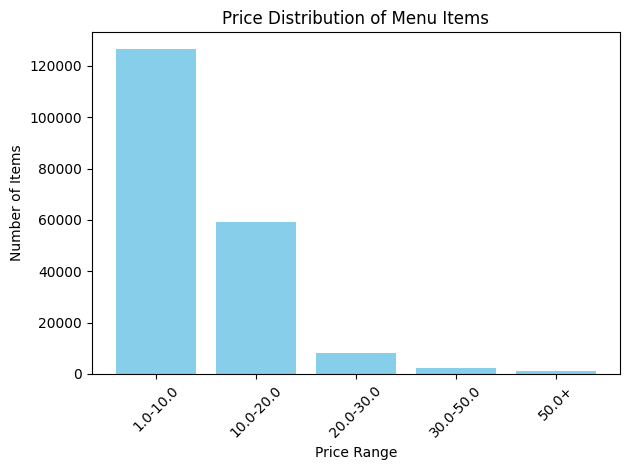

In [9]:
rice_ranges = [x[0] for x in uberEats_results]  # Get the price range labels
item_counts = [x[1] for x in uberEats_results]  # Get the counts for each price range

# Create a bar plot (histogram)
plt.bar(price_ranges, item_counts, color='skyblue')
plt.title('Price Distribution of Menu Items')
plt.xlabel('Price Range')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make room for the labels

# Show the plot
plt.show()

#### 2-Distribution of restaurants per location

##### Deliveroo DB

In [10]:
try:
    # SQL query for deliveroo data
    deliveroo = """
        SELECT
            COUNT(restaurants.id) AS number_of_resturants,
            restaurants.postal_code
        FROM
            restaurants
        WHERE
            restaurants.postal_code <> ''
        GROUP BY
            restaurants.postal_code
        ORDER BY
            number_of_resturants DESC;
    """
    deliveroo_results = conn.execute(deliveroo).fetchall()
    for row in deliveroo_results:
        print(row)

except sqlite3.OperationalError as e:
    print("Error:", e)

(459, '2000')
(427, '9000')
(230, '3000')
(189, '8000')
(128, '2018')
(110, '2800')
(109, '8500')
(77, '3500')
(61, '1180')
(57, '8400')
(54, '1030')
(52, '2600')
(52, '2060')
(45, '1410')
(37, '1200')
(36, '8800')
(35, '1150')
(35, '1090')
(34, '9300')
(29, '9100')
(28, '2140')
(26, '1140')
(26, '1020')
(24, '3600')
(24, '2100')
(19, '8310')
(18, '8200')
(18, '2610')
(17, '2300')
(16, '1800')
(15, '9050')
(15, '1082')
(14, '3800')
(14, '2020')
(13, '1950')
(13, '1190')
(11, '9200')
(11, '1080')
(9, '1083')
(8, '9040')
(8, '2640')
(8, '2170')
(8, '1000')
(7, '3010')
(6, '1160')
(5, '8501')
(5, '3001')
(5, '1853')
(5, '1620')
(4, '2110')
(4, '1780')
(4, '1130')
(4, '1120')
(3, '3511')
(3, '2900')
(3, '2660')
(3, '1600')
(2, '8510')
(2, '8300')
(2, '2030')
(2, '1970')
(2, '1932')
(2, '1831')
(1, '9308')
(1, '9070')
(1, '9041')
(1, '9030')
(1, '4000')
(1, '3360')
(1, '3020')
(1, '2812')
(1, '2360')
(1, '2180')
(1, '2160')
(1, '2150')
(1, '2050')
(1, '1930')
(1, '1850')
(1, '1830')
(1, '17

##### Takeawy DB

In [11]:
try:
    # SQL query for Takeawy data
    takeAwy = """
    SELECT
        COUNT(DISTINCT tw.restaurants.primarySlug) AS number_of_resturants,
        tw.locations.postalCode as postal_code
    FROM
        tw.restaurants
        JOIN tw.locations_to_restaurants ON tw.restaurants.primarySlug = tw.locations_to_restaurants.restaurant_id
        JOIN tw.locations ON tw.locations_to_restaurants.location_id = tw.locations."ID"
    GROUP BY
        tw.locations.postalCode
    ORDER BY
        number_of_resturants DESC;
    """
    takeAwy_results = conn.execute(takeAwy).fetchall()
    for row in takeAwy_results:
        print(row)

except sqlite3.OperationalError as e:
    print("Error:", e)

(605, 1140)
(578, 2600)
(570, 2140)
(566, 2018)
(547, 2060)
(534, 2000)
(509, 2100)
(485, 2020)
(422, 2170)
(414, 2030)
(353, 9000)
(345, 2050)
(331, 9050)
(330, 9040)
(285, 9070)
(281, 2610)
(269, 1700)
(264, 1932)
(258, 9030)
(255, 1620)
(251, 2640)
(249, 9032)
(219, 1800)
(219, 1600)
(217, 2660)
(209, 2150)
(203, 3000)
(199, 9820)
(199, 3010)
(197, 3012)
(196, 2900)
(195, 3001)
(193, 9051)
(193, 9031)
(190, 3020)
(186, 2160)
(180, 1780)
(177, 1853)
(164, 1702)
(161, 1731)
(160, 1831)
(150, 9041)
(146, 9052)
(146, 2110)
(146, 1950)
(137, 2650)
(137, 1930)
(133, 1601)
(132, 3360)
(127, 2070)
(127, 1850)
(118, 2800)
(114, 1830)
(113, 1630)
(112, 1701)
(112, 1602)
(110, 8310)
(110, 2860)
(109, 8200)
(109, 8000)
(108, 1650)
(106, 1980)
(105, 3220)
(102, 1970)
(100, 9090)
(94, 8400)
(94, 2812)
(93, 2811)
(93, 1933)
(92, 2180)
(91, 2820)
(88, 2530)
(88, 1981)
(88, 1640)
(85, 3210)
(84, 3050)
(83, 8020)
(82, 1820)
(81, 3080)
(80, 8450)
(80, 1860)
(78, 2930)
(76, 2630)
(75, 9320)
(73, 2550)


##### uberEats DB

In [60]:
try:
    # SQL query for UberEats data
    uberEats = """
        SELECT
            count(DISTINCT ue.restaurants.id) AS number_of_resturants , ue.locations.region AS postal_code
        FROM
            ue.restaurants
            JOIN ue.locations_to_restaurants ON ue.restaurants.id = ue.locations_to_restaurants.restaurant_id
            JOIN ue.locations ON ue.locations_to_restaurants.location_id = ue.locations.id
        GROUP BY
            ue.locations.region
        Order by number_of_resturants DESC;
            """
    uberEats_results =conn.execute(uberEats).fetchall()
    for row in uberEats_results:
        print(row)

except sqlite3.OperationalError as e:
    print("Error:", e)

(667, '2018')
(643, '2140')
(624, '2000')
(623, '2600')
(606, '2060')
(448, '2100')
(358, '2020')
(344, '9000')
(309, '9040')
(292, '9050')
(238, '2170')
(209, '2610')
(200, '3000')
(198, '3001')
(195, '3010')
(187, '1700')
(179, '1950')
(173, '3012')
(165, '9070')
(164, '1702')
(163, '1140')
(162, '9032')
(158, '9030')
(157, '1932')
(133, '1620')
(132, '1800')
(129, '2030')
(127, '1970')
(125, '2640')
(121, '3020')
(121, '2660')
(118, '1853')
(113, '2900')
(110, '2150')
(107, '1831')
(107, '1780')
(103, '1600')
(101, '8310')
(100, '8000')
(98, '2050')
(98, '1731')
(91, '1930')
(91, '1601')
(89, '8200')
(87, '2650')
(87, '2160')
(82, '1640')
(77, '1630')
(71, '2860')
(70, '2800')
(62, '9300')
(61, '9320')
(60, '1701')
(59, '1850')
(57, '1830')
(54, '9308')
(54, '3090')
(53, '8500')
(51, '8400')
(49, '3500')
(49, '2811')
(48, '8530')
(48, '8501')
(45, '9100')
(43, '3511')
(43, '1650')
(42, '9111')
(42, '8520')
(39, '8450')
(39, '2180')
(38, '9820')
(37, '9310')
(37, '8510')
(37, '2070')

#### 3- Top 10 pizza restaurants by rating

##### Deliveroo DB

In [61]:
try:
# SQL query for deliveroo data
    deliveroo = """ SELECT category, name, rating, CAST(rating_number AS INTEGER) as rating_number
                    FROM restaurants
                    WHERE category = 'Pizza' AND CAST(rating_number AS INTEGER) > 100
                    ORDER BY rating DESC"""
    deliveroo_results =conn.execute(deliveroo).fetchall()
    for row in deliveroo_results:
        print(row)
except sqlite3.OperationalError as e:
    print("Error:", e)


('Pizza', 'La Barchetta', 4.6, 500)
('Pizza', 'Sforno', 4.6, 401)
('Pizza', 'Tutti Atelier', 4.5, 385)
('Pizza', "That's Amore", 4.5, 500)
('Pizza', 'Piano A apulian pizza', 4.5, 231)
('Pizza', 'PIZZERIA ROSSI', 4.4, 449)
('Pizza', 'La Trattoria, Premium Pizza & wine', 4.3, 297)
('Pizza', "Papa Paolo's Pizza", 4.3, 292)
('Pizza', 'La gondola Brugge', 4.3, 500)
('Pizza', 'Malaciorta', 4.3, 143)
('Pizza', 'IL Fuoco', 4.3, 140)
('Pizza', 'Standard ', 4.2, 500)
('Pizza', 'Ali Baba', 4.2, 479)
('Pizza', 'Dal Pesce Innamorato', 4.2, 407)
('Pizza', 'Epicuro', 4.2, 336)
('Pizza', 'Verona | Antwerp', 4.2, 288)
('Pizza', 'ORFEO', 4.2, 264)
('Pizza', "Pizza & Pasta Poppy's", 4.2, 161)
('Pizza', 'Peppermint Park', 4.2, 124)
('Pizza', "'t Dagelijks Broodje", 4.1, 280)
('Pizza', 'Ristorante Pizzeria La Sardegna', 4.1, 351)
('Pizza', 'pizza overpoort', 4.1, 293)
('Pizza', 'Pizzeria La Lanterna', 4.1, 331)
('Pizza', 'La Loggia MEC', 4.1, 487)
('Pizza', 'Nonna stella Gent', 4.1, 500)
('Pizza', 'Pinocch

#### 4- Locations offering kapsalons and their average price.

##### Deliveroo DB

In [72]:
try:
    deliveroo = """SELECT 
                        restaurants.postal_code, 
                        menu_items.name, 
                        ROUND(AVG(menu_items.price),2) AS average_kapsalon_price 
                    FROM 
                        restaurants
                        INNER JOIN 
                            menu_items
                        ON 
                            restaurants.id = menu_items.restaurant_id
                    WHERE 
                            menu_items.name = 'Kapsalon' 
                            AND menu_items.price IS NOT NULL 
                            AND menu_items.price > 0
                    GROUP BY 
                            restaurants.postal_code, menu_items.name
                    ORDER BY 
                            average_kapsalon_price DESC;"""
    deliveroo_results =conn.execute(deliveroo).fetchall()
    for row in deliveroo_results:
        print(row)
except sqlite3.OperationalError as e:
    print("Error:", e)

('9100', 'Kapsalon', 15.6)
('2800', 'Kapsalon', 14.9)
('8310', 'Kapsalon', 12.5)
('8500', 'Kapsalon', 11.11)
('2640', 'Kapsalon', 10.5)
('8000', 'Kapsalon', 9.67)
('1180', 'Kapsalon', 9.5)
('3000', 'Kapsalon', 9.25)
('8501', 'Kapsalon', 9.0)
('1140', 'Kapsalon', 8.5)
('1410', 'Kapsalon', 8.5)
('2000', 'Kapsalon', 8.5)
('2060', 'Kapsalon', 8.33)
('9050', 'Kapsalon', 7.5)
('1030', 'Kapsalon', 7.0)


##### TakeAwy DB

In [73]:
try:
    takeAwy = """SELECT
                        tw.locations.postalCode,
                        tw.menuItems.name,
                        ROUND(AVG(tw.menuItems.price),2) AS average_kapsalon_price
                    FROM
                        tw.restaurants
                        INNER JOIN
                            tw.menuItems
                    ON
                        tw.restaurants.primarySlug = tw.menuItems.primarySlug
                    INNER JOIN
                        tw.locations_to_restaurants
                    ON
                        tw.restaurants.primarySlug = tw.locations_to_restaurants.restaurant_id
                    INNER JOIN
                        tw.locations
                    ON
                        tw.locations_to_restaurants.location_id = tw.locations.ID
                    WHERE
                        tw.menuItems.name = 'Kapsalon'
                        AND tw.menuItems.price > 0
                        AND tw.menuItems.price IS NOT NULL
                        AND tw.locations.postalCode IS NOT NULL
                    GROUP BY
                        tw.locations.postalCode, tw.menuItems.name
                    ORDER BY
                        average_kapsalon_price DESC;"""
    takeAwy_results =conn.execute(takeAwy).fetchall()
    for row in takeAwy_results:
            print(row)
except sqlite3.OperationalError as e:
        print("Error:", e)

(8553, 'Kapsalon', 14.5)
(8572, 'Kapsalon', 14.5)
(8573, 'Kapsalon', 14.5)
(8581, 'Kapsalon', 14.5)
(8700, 'Kapsalon', 14.5)
(9636, 'Kapsalon', 14.5)
(9680, 'Kapsalon', 14.5)
(9681, 'Kapsalon', 14.5)
(9700, 'Kapsalon', 14.5)
(9770, 'Kapsalon', 14.5)
(9771, 'Kapsalon', 14.5)
(9772, 'Kapsalon', 14.5)
(9790, 'Kapsalon', 14.5)
(9831, 'Kapsalon', 14.5)
(9850, 'Kapsalon', 14.5)
(8540, 'Kapsalon', 14.25)
(8570, 'Kapsalon', 14.25)
(8710, 'Kapsalon', 14.25)
(8720, 'Kapsalon', 14.25)
(8790, 'Kapsalon', 14.25)
(8792, 'Kapsalon', 14.25)
(8000, 'Kapsalon', 14.0)
(8200, 'Kapsalon', 14.0)
(8310, 'Kapsalon', 14.0)
(8470, 'Kapsalon', 14.0)
(8531, 'Kapsalon', 14.0)
(8780, 'Kapsalon', 14.0)
(8791, 'Kapsalon', 14.0)
(8460, 'Kapsalon', 13.0)
(8450, 'Kapsalon', 12.67)
(1745, 'Kapsalon', 12.5)
(1785, 'Kapsalon', 12.5)
(8800, 'Kapsalon', 12.5)
(8830, 'Kapsalon', 12.5)
(8840, 'Kapsalon', 12.5)
(8890, 'Kapsalon', 12.5)
(8920, 'Kapsalon', 12.5)
(8980, 'Kapsalon', 12.5)
(9630, 'Kapsalon', 12.25)
(9750, 'Kapsalon'

##### UberEats DB

In [74]:
try:
    uberEats = """SELECT 
                    SUBSTR(ue.restaurants.location__address, -4) AS postal_code, 
                    ue.menu_items.name, 
                    CAST(ROUND(AVG(ue.menu_items.price) / 100, 2) AS FLOAT) AS average_kapsalon_price
                FROM 
                    ue.menu_items
                INNER JOIN 
                    ue.restaurants 
                ON 
                    ue.menu_items.restaurant_id = ue.restaurants.id
                WHERE 
                    CAST(ue.menu_items.price AS FLOAT) > 0 
                    AND ue.menu_items.price IS NOT NULL
                    AND ue.menu_items.name = 'Kapsalon'
                    AND SUBSTR(ue.restaurants.location__address, -4) IS NOT NULL
                GROUP BY 
                    SUBSTR(ue.restaurants.location__address, -4), ue.menu_items.name
                ORDER BY 
                    average_kapsalon_price DESC;"""
    uberEats_results =conn.execute(uberEats).fetchall()
    for row in uberEats_results:
            print(row)
except sqlite3.OperationalError as e:
        print("Error:", e)


('8500', 'Kapsalon', 0.14)
('8790', 'Kapsalon', 0.14)
('8301', 'Kapsalon', 0.13)
('9320', 'Kapsalon', 0.13)
('2800', 'Kapsalon', 0.12)
('9300', 'Kapsalon', 0.12)
('2930', 'Kapsalon', 0.11)
('1180', 'Kapsalon', 0.1)
('1980', 'Kapsalon', 0.1)
('2170', 'Kapsalon', 0.1)
('2600', 'Kapsalon', 0.1)
('2640', 'Kapsalon', 0.1)
('3001', 'Kapsalon', 0.1)
('3600', 'Kapsalon', 0.1)
('9000', 'Kapsalon', 0.1)
('2000', 'Kapsalon', 0.09)
('2060', 'Kapsalon', 0.09)
('2160', 'Kapsalon', 0.09)
('2627', 'Kapsalon', 0.09)
('8000', 'Kapsalon', 0.09)
('8400', 'Kapsalon', 0.09)
('9100', 'Kapsalon', 0.09)
('1030', 'Kapsalon', 0.08)
('1083', 'Kapsalon', 0.08)
('2840', 'Kapsalon', 0.08)
('3090', 'Kapsalon', 0.08)
('1800', 'Kapsalon', 0.07)
('8560', 'Kapsalon', 0.07)
('9050', 'Kapsalon', 0.07)
('1480', 'Kapsalon', 0.05)


#### Compare restaurant distributions across UberEats, Deliveroo, and Takeaway. What are some of the market trends?

In [75]:
combined_query = """
    SELECT 
        'Deliveroo' AS platform, 
        COUNT(restaurants.id) AS number_of_restaurants, 
        cast(restaurants.postal_code as text) as postal_code
    FROM 
        restaurants
    WHERE 
        restaurants.postal_code <> ''
    GROUP BY 
        restaurants.postal_code

    UNION ALL

    SELECT 
        'Takeaway' AS platform, 
        COUNT(DISTINCT tw.restaurants.primarySlug) AS number_of_restaurants, 
        cast(tw.locations.postalCode as text) AS postal_code
    FROM 
        tw.restaurants
        JOIN tw.locations_to_restaurants 
        ON tw.restaurants.primarySlug = tw.locations_to_restaurants.restaurant_id
        JOIN tw.locations 
        ON tw.locations_to_restaurants.location_id = tw.locations."ID"
    GROUP BY 
        tw.locations.postalCode

    UNION ALL

    SELECT 
        'UberEats' AS platform, 
        COUNT(DISTINCT ue.restaurants.id) AS number_of_restaurants, 
        cast(ue.locations.region as text) AS postal_code
    FROM 
        ue.restaurants
        JOIN ue.locations_to_restaurants 
        ON ue.restaurants.id = ue.locations_to_restaurants.restaurant_id
        JOIN ue.locations 
        ON ue.locations_to_restaurants.location_id = ue.locations.id
    GROUP BY 
        ue.locations.region

    ORDER BY 
        number_of_restaurants DESC;
"""
results = conn.execute(combined_query).fetchall()
for row in results:
        print(row)


('UberEats', 667, '2018')
('UberEats', 643, '2140')
('UberEats', 624, '2000')
('UberEats', 623, '2600')
('UberEats', 606, '2060')
('Takeaway', 605, '1140')
('Takeaway', 578, '2600')
('Takeaway', 570, '2140')
('Takeaway', 566, '2018')
('Takeaway', 547, '2060')
('Takeaway', 534, '2000')
('Takeaway', 509, '2100')
('Takeaway', 485, '2020')
('Deliveroo', 459, '2000')
('UberEats', 448, '2100')
('Deliveroo', 427, '9000')
('Takeaway', 422, '2170')
('Takeaway', 414, '2030')
('UberEats', 358, '2020')
('Takeaway', 353, '9000')
('Takeaway', 345, '2050')
('UberEats', 344, '9000')
('Takeaway', 331, '9050')
('Takeaway', 330, '9040')
('UberEats', 309, '9040')
('UberEats', 292, '9050')
('Takeaway', 285, '9070')
('Takeaway', 281, '2610')
('Takeaway', 269, '1700')
('Takeaway', 264, '1932')
('Takeaway', 258, '9030')
('Takeaway', 255, '1620')
('Takeaway', 251, '2640')
('Takeaway', 249, '9032')
('UberEats', 238, '2170')
('Deliveroo', 229, '3000')
('Takeaway', 219, '1800')
('Takeaway', 219, '1600')
('Takeawa

   platform  number_of_restaurants postal_code
0  UberEats                    667        2018
1  UberEats                    643        2140
2  UberEats                    624        2000
3  UberEats                    623        2600
4  UberEats                    606        2060
Index(['platform', 'number_of_restaurants', 'postal_code'], dtype='object')


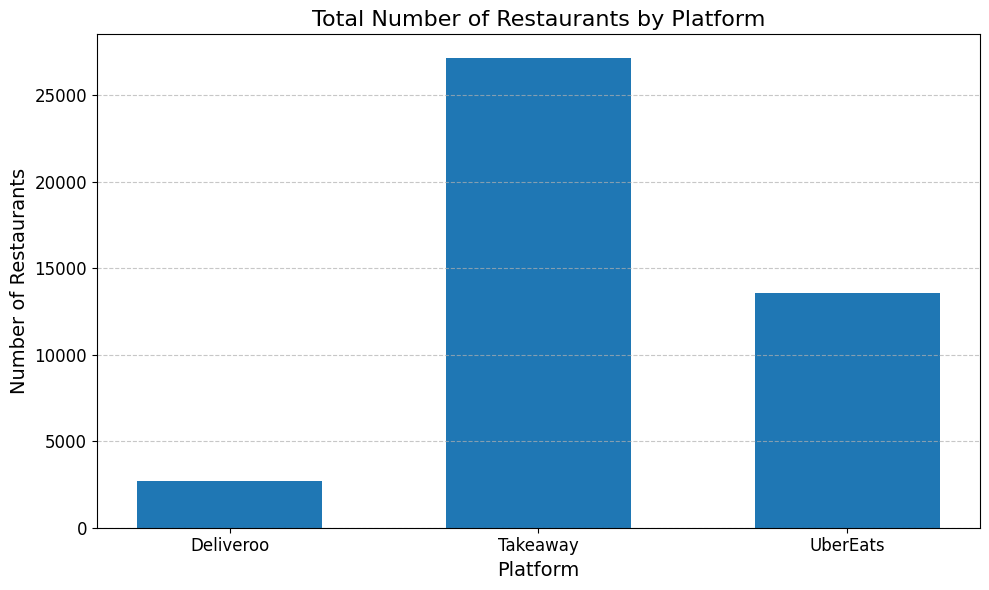

platform     Deliveroo  Takeaway  UberEats
postal_code                               
2000             459.0     534.0     624.0
2018               0.0     566.0     667.0
2140               0.0     570.0     643.0
2600               0.0     578.0     623.0
2060               0.0     547.0     606.0
9000             427.0     353.0     344.0
2100               0.0     509.0     448.0
2020               0.0     485.0     358.0
2170               0.0     422.0     238.0
9040               0.0     330.0     309.0
3000             229.0     203.0     200.0
9050               0.0     331.0     292.0
1140               0.0     605.0       0.0
2610               0.0     281.0     209.0
2030               0.0     414.0       0.0
3010               0.0     199.0     195.0
3001               0.0     195.0     198.0
2050               0.0     345.0       0.0
9070               0.0     285.0       0.0
1700               0.0     269.0       0.0
1932               0.0     264.0       0.0
9030       

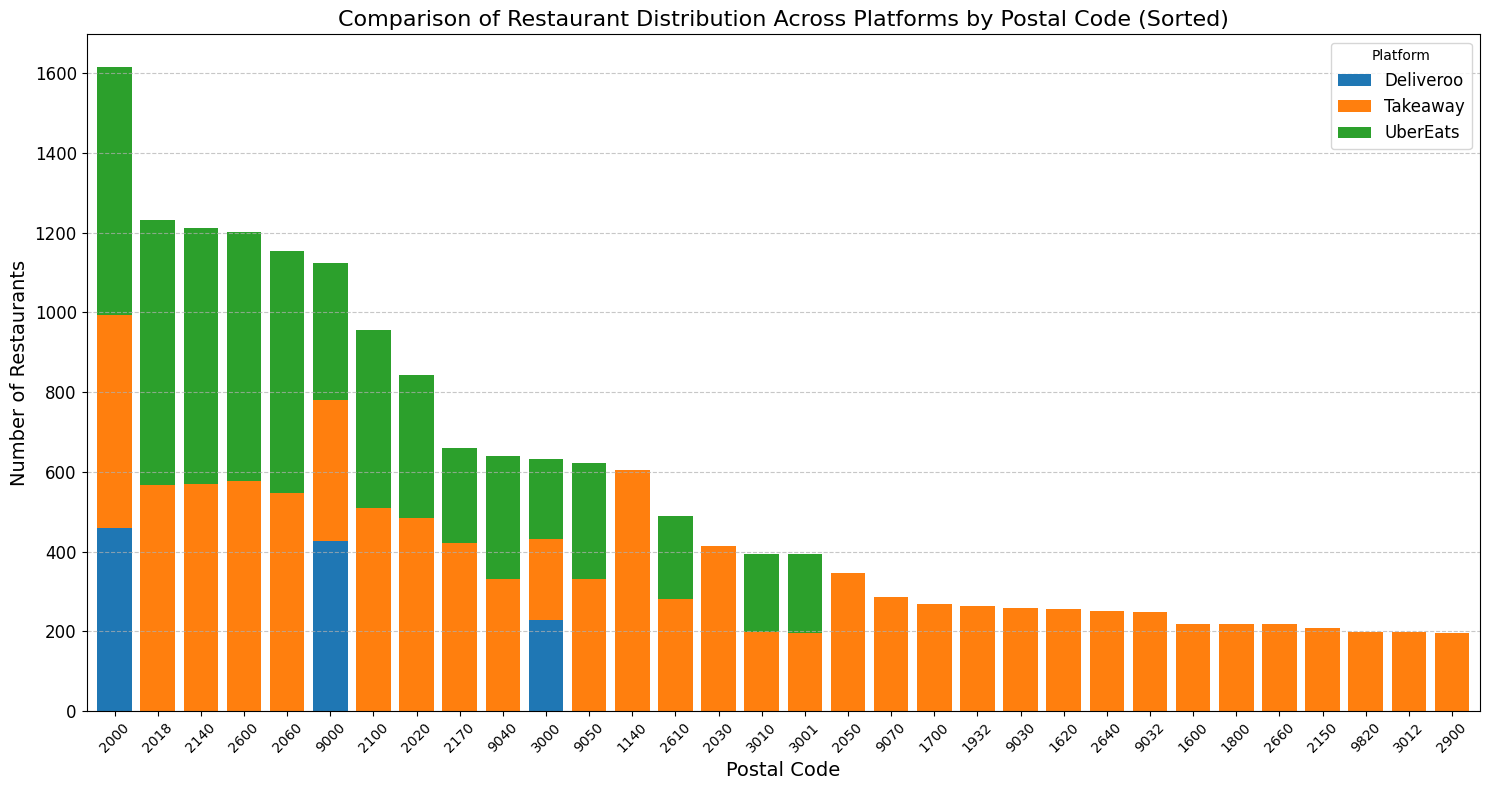

In [ ]:
# Graphing the Comparing between distributions of Res
df = pd.read_sql_query(combined_query, conn)
print(df.head())  # Display the first few rows of the DataFrame
print(df.columns)  # Display the column names in the DataFrame
# Assuming `df` contains the query results
# Columns: 'Platform', 'Number of Restaurants', 'Postal Code'

# Group by Platform and aggregate restaurant counts for overall comparison
platform_summary = df.groupby('platform')['number_of_restaurants'].sum().reset_index()

# Create a bar chart for platform-level comparison
plt.figure(figsize=(10, 6))
plt.bar(platform_summary['platform'], platform_summary['number_of_restaurants'], width=0.6)

# Add title and labels
plt.title('Total Number of Restaurants by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the graph
plt.tight_layout()
plt.show()

# Create a postal code-level stacked bar chart
df = df.head(50)
# Pivot the data for better organization
pivot_df = df.pivot(index='postal_code', columns='platform', values='number_of_restaurants').fillna(0)

# Add a column for the total number of restaurants across platforms
pivot_df['Total Restaurants'] = pivot_df.sum(axis=1)

# Sort by the total number of restaurants in descending order
pivot_df = pivot_df.sort_values(by='Total Restaurants', ascending=False)

# Drop the 'Total Restaurants' column (if not needed for visualization)
pivot_df = pivot_df.drop(columns=['Total Restaurants'])

# Display the sorted DataFrame
print(pivot_df)

# Now you can plot the sorted data
pivot_df.plot(kind='bar', stacked=True, figsize=(15, 8), width=0.8)

# Customize the chart
plt.title("Comparison of Restaurant Distribution Across Platforms by Postal Code (Sorted)", fontsize=16)
plt.ylabel("Number of Restaurants", fontsize=14)
plt.xlabel("Postal Code", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)
plt.legend(title="Platform", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the chart
plt.tight_layout()
plt.show()


#### Detaching DBs and  Closing Connections

In [ ]:
# Detach the databases when done
conn.execute("DETACH DATABASE tw;")
conn.execute("DETACH DATABASE ue;")

# Close the connection
conn.close()